For this assigment, I will be creating Logistic, Ridge, and Lasso regression models of the same data to compare their performance on a binary variable. The data is crime statistics from the state of New York in the year 2013 by city.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
sns.set_style('white')

In [79]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', 
                 index_col='City',
                 names=['City', 'Population', 'Violent_crime', 'Murder', 'Rape_1', 'Rape_2',
                       'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
                       'Larceny_theft', 'Motor_vehicle_theft', 'Arson']
                )

df = df.drop(index='City')

# Remove commas and force to be numbers
for col in df:
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Remove Rape 1 and Arson due to so many NaN values making them hard to create features out of
df = df.dropna(axis=1, how='any')

df.head(10)

,Population,Violent_crime,Murder,Rape_2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
City,,,,,,,,,,
Adams Village,1861,0,0,0,0,0,12,2,10,0
Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
Akron Village,2846,3,0,0,0,3,16,1,15,0
Albany,97956,791,8,30,227,526,4090,705,3243,142
Albion Village,6388,23,0,3,4,16,223,53,165,5
Alfred Village,4089,5,0,0,3,2,46,10,36,0
Allegany Village,1781,3,0,0,0,3,10,0,10,0
Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
Amityville Village,9519,9,0,2,4,3,210,16,188,6


In [80]:
# Change Murder to binary classification variable to run logistic regression on
df.Murder = np.where(df.Murder>0, 1, 0)

# Drop New York because of its outlier effect
df = df.drop(index='New York')

df.describe()

,Population,Violent_crime,Murder,Rape_2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,15956.685879,51.213256,0.138329,2.677233,17.867435,30.063401,385.752161,72.172911,298.994236,14.585014
std,27080.218837,236.667435,0.345743,10.741020,94.972492,128.783376,1034.369072,264.941381,715.232296,67.682236
min,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2997.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,6.000000,31.000000,0.000000
50%,7187.000000,6.000000,0.000000,0.000000,1.000000,4.000000,112.000000,17.000000,94.000000,2.000000
75%,18160.500000,21.500000,0.000000,2.000000,5.000000,14.000000,340.500000,51.000000,284.500000,7.000000
max,258789.000000,3249.000000,1.000000,145.000000,1322.000000,1735.000000,12491.000000,3458.000000,8076.000000,957.000000


In [81]:
# Store Murder binary variable
y = df.Murder

# Standardize the data without Murder variable
df = df.drop(columns='Murder')
names = df.columns
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=names)

df.head(10)

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Population,Violent_crime,Rape_2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,-0.521268,-0.216706,-0.249613,-0.188404,-0.233779,-0.361855,-0.265244,-0.404640,-0.215804
1,-0.494789,-0.204012,-0.249613,-0.188404,-0.210450,-0.350237,-0.261465,-0.390638,-0.201007
2,-0.484842,-0.204012,-0.249613,-0.188404,-0.210450,-0.357983,-0.269024,-0.397639,-0.215804
3,3.032388,3.130363,2.547451,2.205213,3.856497,3.586338,2.392004,4.122097,1.885265
4,-0.353856,-0.119383,0.030093,-0.146226,-0.109360,-0.157572,-0.072471,-0.187614,-0.141822
5,-0.438875,-0.195549,-0.249613,-0.156771,-0.218226,-0.328938,-0.235006,-0.368236,-0.215804
6,-0.524226,-0.204012,-0.249613,-0.188404,-0.210450,-0.363792,-0.272804,-0.404640,-0.215804
7,3.784574,0.236058,0.403035,0.138477,0.295002,1.677109,0.498289,2.216471,0.257677
8,-0.238070,-0.178623,-0.063142,-0.146226,-0.210450,-0.170158,-0.212326,-0.155410,-0.127026
9,0.082294,-0.089763,-0.249613,-0.061870,-0.093807,0.018635,0.101403,-0.011193,0.006140


In [82]:
df.describe()

,Population,Violent_crime,Rape_2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
count,3.470000e+02,3.470000e+02,3.470000e+02,3.470000e+02,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,3.470000e+02
mean,-2.047674e-17,-2.047674e-17,-5.119184e-18,2.559592e-17,-5.119184e-18,3.583429e-17,1.535755e-17,0.000000,1.023837e-17
std,1.001444e+00,1.001444e+00,1.001444e+00,1.001444e+00,1.001444e+00,1.001444e+00,1.001444e+00,1.001444,1.001444e+00
min,-5.706368e-01,-2.167058e-01,-2.496131e-01,-1.884044e-01,-2.337787e-01,-3.734733e-01,-2.728042e-01,-0.418642,-2.158037e-01
25%,-4.792576e-01,-2.082429e-01,-2.496131e-01,-1.884044e-01,-2.260025e-01,-3.347465e-01,-2.501250e-01,-0.375236,-2.158037e-01
50%,-3.243087e-01,-1.913172e-01,-2.496131e-01,-1.778598e-01,-2.026740e-01,-2.650383e-01,-2.085464e-01,-0.287026,-1.862112e-01
75%,8.149847e-02,-1.257299e-01,-6.314218e-02,-1.356816e-01,-1.249121e-01,-4.381174e-02,-8.003086e-02,-0.020294,-1.122299e-01
max,8.980096e+00,1.353124e+01,1.326953e+01,1.375152e+01,1.325791e+01,1.171993e+01,1.279799e+01,10.889100,1.394422e+01


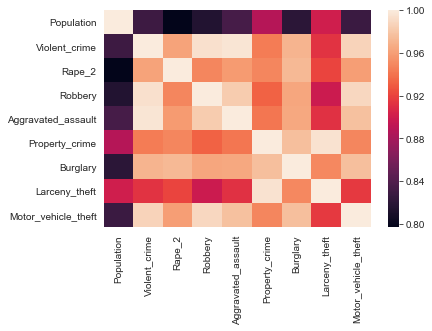

In [83]:
corrmat = df.corr()
sns.heatmap(corrmat)

In [84]:
# Using PCA on this data in a pervious assignment had little effect in getting better features.
# I am going to attempt some different feature selection processes.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = SelectKBest(f_regression, k=3).fit_transform(df, y)

X = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
X.describe()

,Feature 1,Feature 2,Feature 3
count,3.470000e+02,3.470000e+02,347.000000
mean,-2.047674e-17,3.583429e-17,0.000000
std,1.001444e+00,1.001444e+00,1.001444
min,-5.706368e-01,-3.734733e-01,-0.418642
25%,-4.792576e-01,-3.347465e-01,-0.375236
50%,-3.243087e-01,-2.650383e-01,-0.287026
75%,8.149847e-02,-4.381174e-02,-0.020294
max,8.980096e+00,1.171993e+01,10.889100


In [90]:
# Run vanilla logistic regression with regularization suppressed to compare to Ridge and Lasso
lr = linear_model.LogisticRegression(C=1e9)

trainsize = 175

X_test = X.iloc[trainsize:, :].copy()
X_train = X.iloc[:trainsize, :].copy()

y_test = y.iloc[trainsize:].copy()
y_train = y.iloc[:trainsize].copy()

lr.fit(X_train, y_train)

print('Coefficients')
print(lr.coef_)
print(lr.intercept_)
pred_y_sklearn = lr.predict(X_train)

print('\n Accuracy by murder presence for training')
print(pd.crosstab(y_train, pred_y_sklearn))

print('\n Percentage accuracy for training')
print(lr.score(X_train, y_train))

Coefficients
[[  1.32625587  13.27004448 -11.00263734]]
[-2.11214821]

 Accuracy by murder presence for training
col_0     0  1
Murder        
0       152  4
1        13  6

 Percentage accuracy for training
0.9028571428571428


c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
# Testing
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by murder presence for training')
print(pd.crosstab(y_test, pred_y_sklearn))

print('\n Percentage accuracy for training')
print(lr.score(X_test, y_test))


 Accuracy by murder presence for training
col_0     0   1
Murder         
0       141   2
1        18  11

 Percentage accuracy for training
0.8837209302325582


The vanilla logistic regression has a high percent accuracy on the test data. However, while it has high specificiy, it has low sensitivity. The high accuracy due to the class imbalance of murders present.

Let's move on to Ridge regression to see if it fares better.

In [99]:
ridgeregr = linear_model.Ridge(alpha=0.5, fit_intercept=True)

ridgeregr.fit(X_train, y_train)
print('Coefficients:')
print(ridgeregr.coef_)
print(ridgeregr.score(X_test, y_test))

Coefficients:
[ 0.13205294 -0.15081874  0.1585989 ]
0.25914822510686786


Ridge appears to not be a great model for this data. How about Lasso?

In [100]:
lass = linear_model.Lasso(alpha=0.5)

lass.fit(X_train, y_train)
print('Coefficients:')
print(lass.coef_)
print(lass.score(X_test, y_test))

Coefficients:
[0. 0. 0.]
-0.025710242466892685


Lasso does not work with this data because I have already selected it down to 3 features. What if I run it on all of the original features?

In [101]:
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()
lass.fit(df_train, y_train)
print('Coefficients:')
print(lass.coef_)
print(lass.score(df_test, y_test))

Coefficients:
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
-0.025710242466892685


Still not good. What if I try to go back to ridge with the full set of original features?

In [102]:
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()
ridgeregr.fit(df_train, y_train)
print('Coefficients:')
print(ridgeregr.coef_)
print(ridgeregr.score(df_test, y_test))

Coefficients:
[ 0.1983528   0.19755276  0.13739871  0.18040157  0.02051139 -0.0408367
 -0.06546838  0.01126389 -0.48685202]
0.30350265631067685


A slight improvement from the original

# Conclusions

It seems that logistic regression is the best model for this dataset as it tested well after training. It did have a shortcoming of not being highly sensitive.

For this exercise, Ridge and Lasso seemed ill equipped because they are meant for more specific problems. Ridge is meant to work on features that are highly correlated and Lasso is meant to work on datasets with many features. They are also both meant to work on continuous variables, so I was somewhat confused as to why I was comparing their performance to Logistic Regression on a binary outcome variable. I would like to see their performance again with a continuous variable with many features.